<h2>Data Science Machine Learning(Regression) Project : Real Estate price prediction in Melbourne</h2>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.describe(include= 'all')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,13580,13580,13580.000000,13580,1.358000e+04,13580,13580,13580,13580.000000,13580.000000,...,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,12211,13580.000000,13580.000000,13580,13580.000000
unique,314,13378,NaN,3,NaN,5,268,58,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,36 Aberfeldie St,NaN,h,NaN,S,Nelson,27/05/2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Moreland,NaN,NaN,Southern Metropolitan,NaN
freq,359,3,NaN,9449,NaN,9022,1565,473,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1163,NaN,NaN,4695,NaN
mean,NaN,NaN,2.937997,NaN,1.075684e+06,NaN,NaN,NaN,10.137776,3105.301915,...,1.534242,1.610075,558.416127,151.967650,1964.684217,NaN,-37.809203,144.995216,NaN,7454.417378
std,NaN,NaN,0.955748,NaN,6.393107e+05,NaN,NaN,NaN,5.868725,90.676964,...,0.691712,0.962634,3990.669241,541.014538,37.273762,NaN,0.079260,0.103916,NaN,4378.581772
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,...,0.000000,0.000000,0.000000,0.000000,1196.000000,NaN,-38.182550,144.431810,NaN,249.000000
25%,NaN,NaN,2.000000,NaN,6.500000e+05,NaN,NaN,NaN,6.100000,3044.000000,...,1.000000,1.000000,177.000000,93.000000,1940.000000,NaN,-37.856822,144.929600,NaN,4380.000000
50%,NaN,NaN,3.000000,NaN,9.030000e+05,NaN,NaN,NaN,9.200000,3084.000000,...,1.000000,2.000000,440.000000,126.000000,1970.000000,NaN,-37.802355,145.000100,NaN,6555.000000
75%,NaN,NaN,3.000000,NaN,1.330000e+06,NaN,NaN,NaN,13.000000,3148.000000,...,2.000000,2.000000,651.000000,174.000000,1999.000000,NaN,-37.756400,145.058305,NaN,10331.000000


In [4]:
df.shape

(13580, 21)

In [5]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
df['Suburb'].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

In [7]:
df['Method'].unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

In [8]:
df['Regionname'].value_counts()

Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64

In [9]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

<h3> EDA </h3>

<h4> Univariate Analysis</h4>

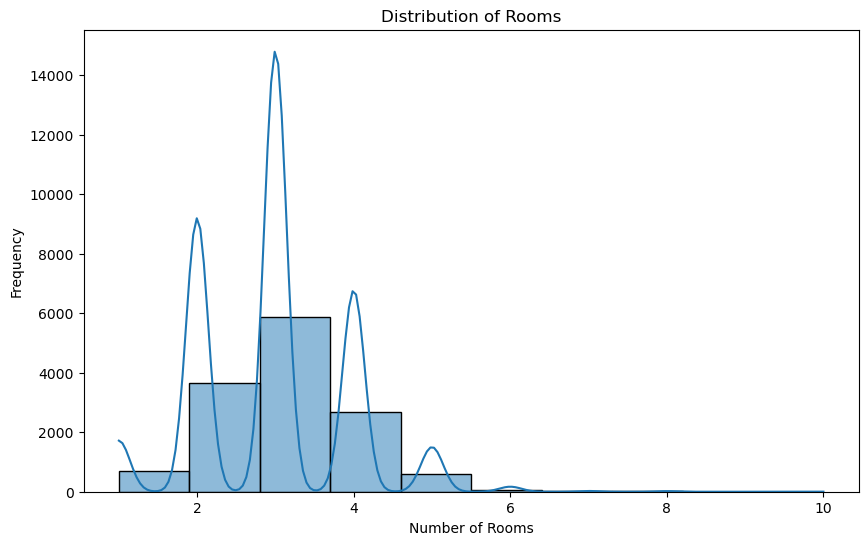

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'Rooms'
plt.figure(figsize=(10, 6))
sns.histplot(df['Rooms'], kde=True, bins=10)
plt.title('Distribution of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.show()




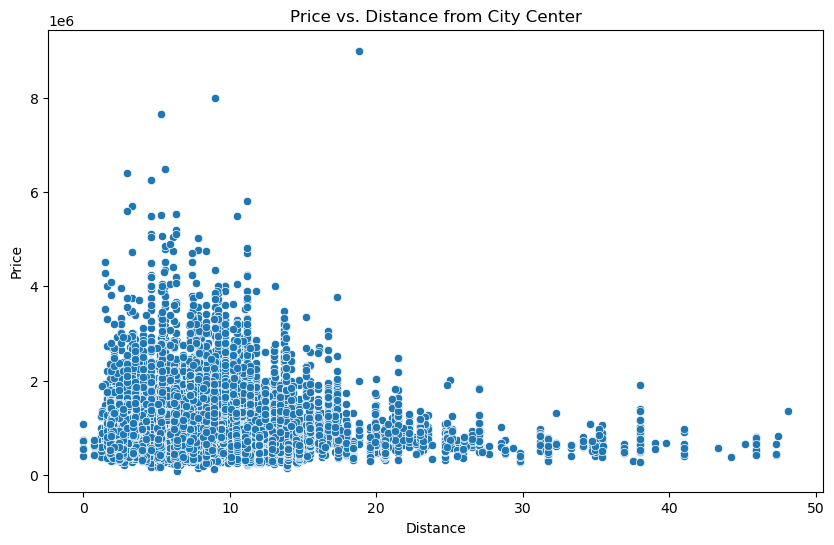

In [11]:
# Scatter plot for 'Price' vs. 'Distance'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Price', data=df)
plt.title('Price vs. Distance from City Center')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

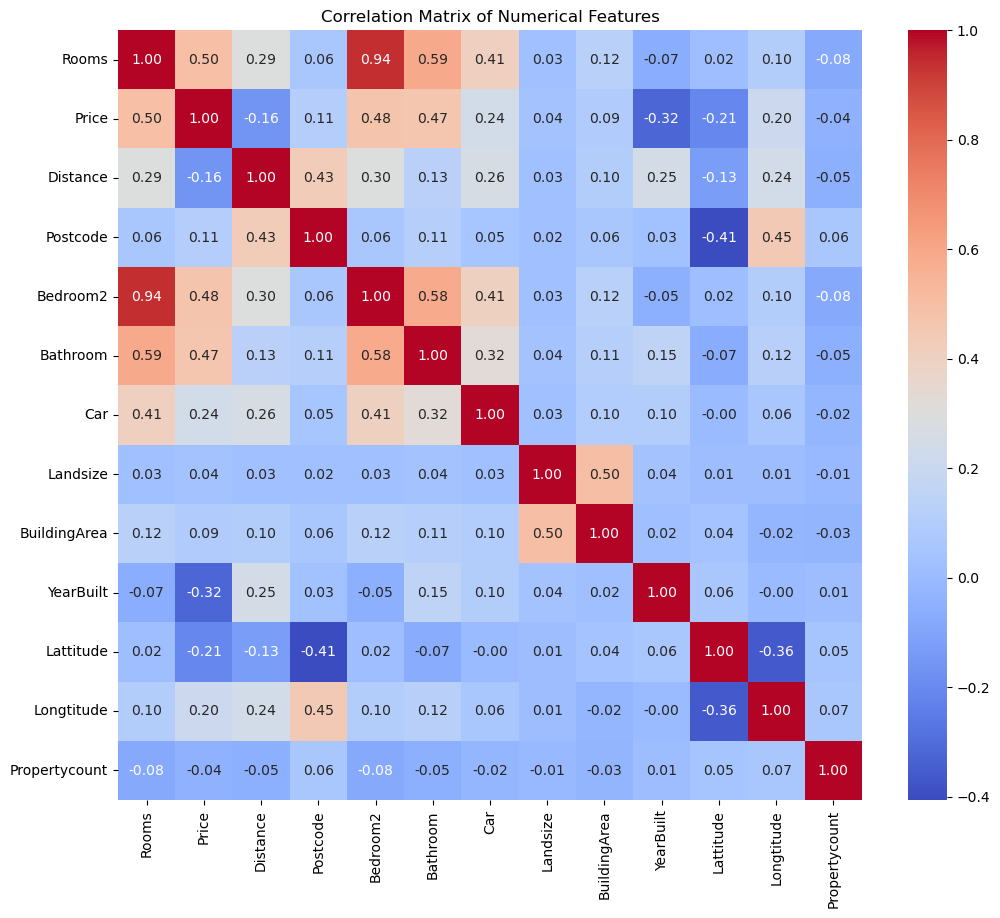

In [12]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

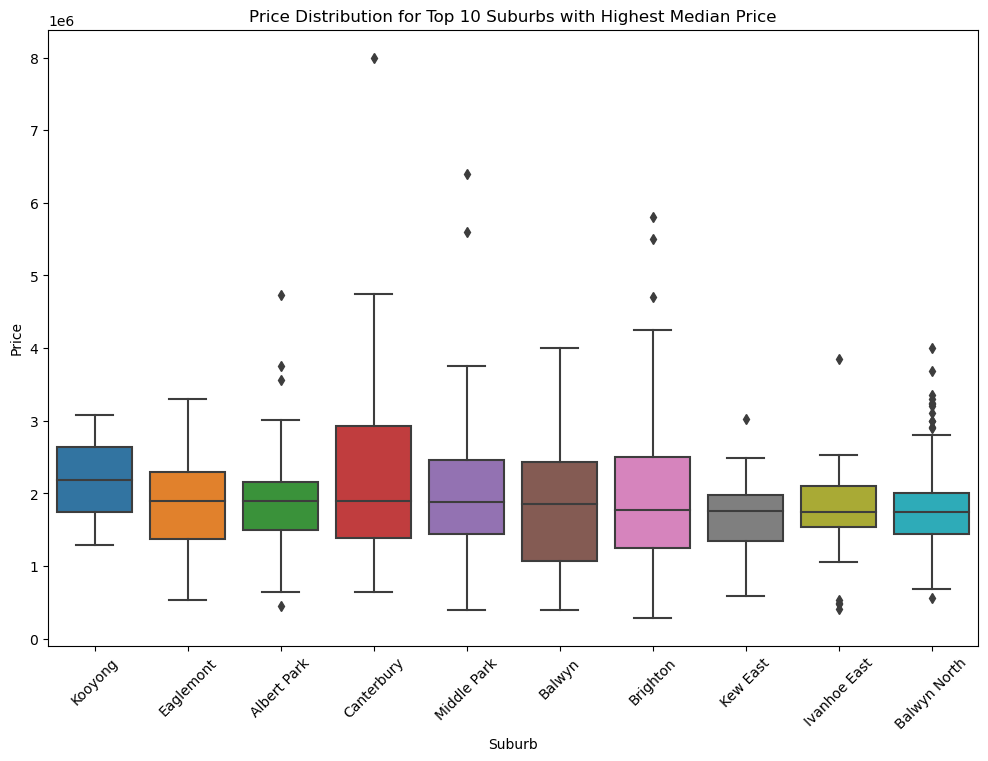

In [13]:
median_price_per_suburb = df.groupby('Suburb')['Price'].median().sort_values(ascending=False)

# Select top 10 suburbs with the highest median price
top_suburbs = median_price_per_suburb.head(10).index

# Filter the DataFrame to include only the top suburbs
top_suburbs_df = df[df['Suburb'].isin(top_suburbs)]

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x='Suburb', y='Price', data=top_suburbs_df, order=top_suburbs)
plt.title('Price Distribution for Top 10 Suburbs with Highest Median Price')
plt.xticks(rotation=45)  # Rotate suburb names for better readability
plt.xlabel('Suburb')
plt.ylabel('Price')
plt.show()









<h3> Data Cleaning: Handling missing values</h3>

In [14]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [15]:
df = df.drop(['YearBuilt', 'CouncilArea','BuildingArea','Bedroom2','Address','Propertycount','Lattitude','Longtitude','SellerG','Method',], axis=1)

In [16]:
df.isnull().sum()

Suburb         0
Rooms          0
Type           0
Price          0
Date           0
Distance       0
Postcode       0
Bathroom       0
Car           62
Landsize       0
Regionname     0
dtype: int64

<h3>Feature Engineering</h3>

In [17]:
#  def add_price_per_sqft(data):
#     data = data.copy()
#     data['price_per_sqft'] = data['Price'] / data['Landsize'].replace(0, np.nan)
#     return data


# df = add_price_per_sqft(df)
# ##

In [18]:
print(df.head())

       Suburb  Rooms Type      Price       Date  Distance  Postcode  Bathroom  \
0  Abbotsford      2    h  1480000.0  3/12/2016       2.5    3067.0       1.0   
1  Abbotsford      2    h  1035000.0  4/02/2016       2.5    3067.0       1.0   
2  Abbotsford      3    h  1465000.0  4/03/2017       2.5    3067.0       2.0   
3  Abbotsford      3    h   850000.0  4/03/2017       2.5    3067.0       2.0   
4  Abbotsford      4    h  1600000.0  4/06/2016       2.5    3067.0       1.0   

   Car  Landsize             Regionname  
0  1.0     202.0  Northern Metropolitan  
1  0.0     156.0  Northern Metropolitan  
2  0.0     134.0  Northern Metropolitan  
3  1.0      94.0  Northern Metropolitan  
4  2.0     120.0  Northern Metropolitan  


In [19]:
# df = df.dropna(subset=['price_per_sqft'])


In [20]:
# print(df['price_per_sqft'].isna().sum())

In [21]:
df.describe(include="all")

,Suburb,Rooms,Type,Price,Date,Distance,Postcode,Bathroom,Car,Landsize,Regionname
count,13580,13580.000000,13580,1.358000e+04,13580,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,13580
unique,314,NaN,3,NaN,58,NaN,NaN,NaN,NaN,NaN,8
top,Reservoir,NaN,h,NaN,27/05/2017,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan
freq,359,NaN,9449,NaN,473,NaN,NaN,NaN,NaN,NaN,4695
mean,NaN,2.937997,NaN,1.075684e+06,NaN,10.137776,3105.301915,1.534242,1.610075,558.416127,NaN
std,NaN,0.955748,NaN,6.393107e+05,NaN,5.868725,90.676964,0.691712,0.962634,3990.669241,NaN
min,NaN,1.000000,NaN,8.500000e+04,NaN,0.000000,3000.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,NaN,6.500000e+05,NaN,6.100000,3044.000000,1.000000,1.000000,177.000000,NaN
50%,NaN,3.000000,NaN,9.030000e+05,NaN,9.200000,3084.000000,1.000000,2.000000,440.000000,NaN
75%,NaN,3.000000,NaN,1.330000e+06,NaN,13.000000,3148.000000,2.000000,2.000000,651.000000,NaN


<h2>Dimentionality Reduction</h2>

We will classify Suburbs as 'others' which have less than 10 data points. We are doing this so when we do one-hot encoding we will have fewer dummy columns

In [22]:
df.Suburb = df.Suburb.apply(lambda x: x.strip())
Suburb_stats = df['Suburb'].value_counts(ascending=False)
Suburb_stats

Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Sandhurst           1
Bullengarook        1
Croydon South       1
Montrose            1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64

In [23]:

len(Suburb_stats[Suburb_stats>10])

207

In [24]:
Suburb_stats_less_than_10 = Suburb_stats[Suburb_stats<=10]
Suburb_stats_less_than_10

Watsonia North    10
Tarneit           10
Travancore        10
Ringwood North    10
Rowville          10
                  ..
Sandhurst          1
Bullengarook       1
Croydon South      1
Montrose           1
Monbulk            1
Name: Suburb, Length: 107, dtype: int64

In [25]:
df.Suburb = df.Suburb.apply(lambda x: 'other' if x in Suburb_stats_less_than_10 else x)
len(df.Suburb.unique())

208

<h2>Outlier removal using IQR</h2>

In [26]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Columns to check for outliers
columns_to_check = ['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize']

# Remove outliers
df_clean = remove_outliers_iqr(df, columns_to_check)



In [27]:
df_clean.describe()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize
count,11173.000000,1.117300e+04,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000
mean,2.768639,9.679620e+05,9.476828,3094.936454,1.426206,1.428623,373.025060
std,0.805289,4.360478e+05,4.528160,64.471724,0.574740,0.720420,278.087329
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000
25%,2.000000,6.365000e+05,6.100000,3042.000000,1.000000,1.000000,145.000000
50%,3.000000,8.785000e+05,9.200000,3078.000000,1.000000,1.000000,336.000000
75%,3.000000,1.250000e+06,12.600000,3145.000000,2.000000,2.000000,603.000000
max,4.000000,2.291000e+06,23.300000,3752.000000,3.000000,3.000000,1313.000000


<h1></h1>

Visualizations before removing outliers:


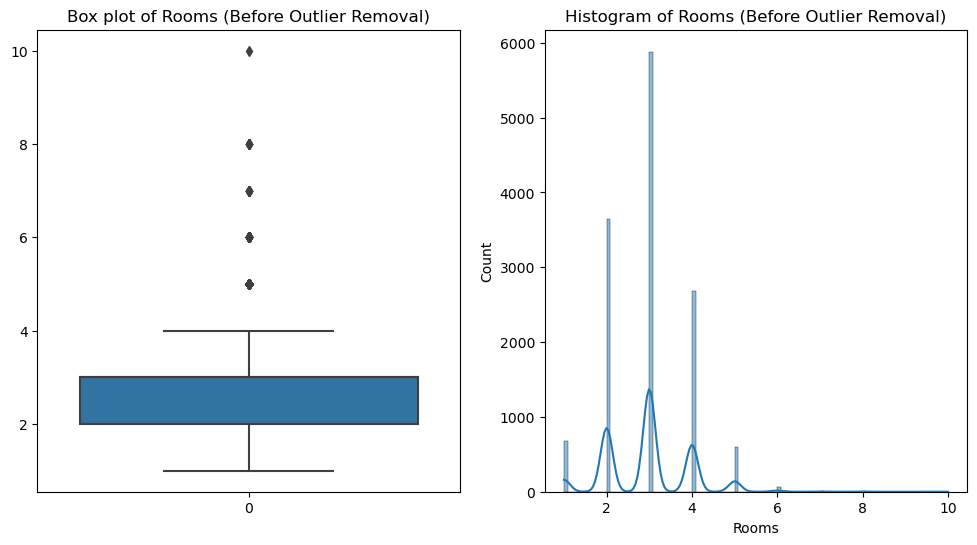

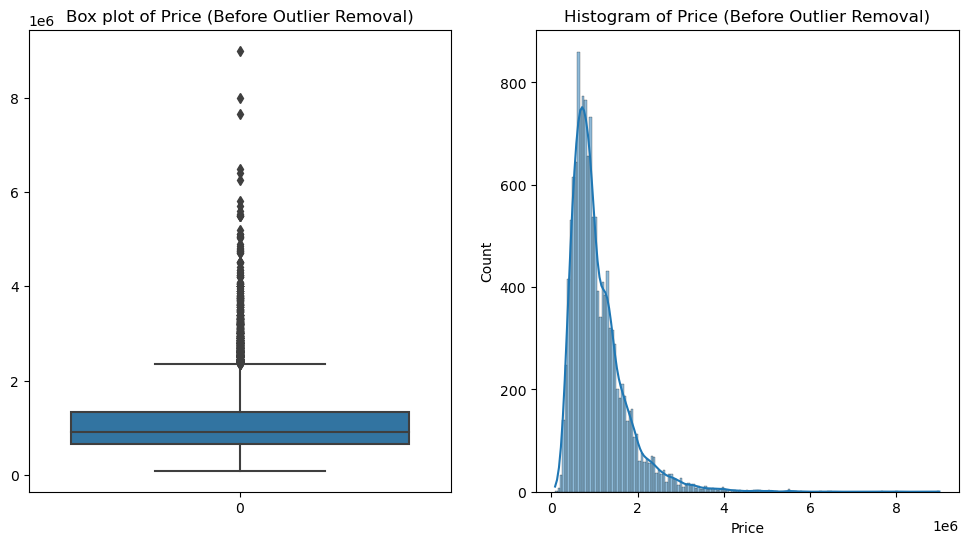

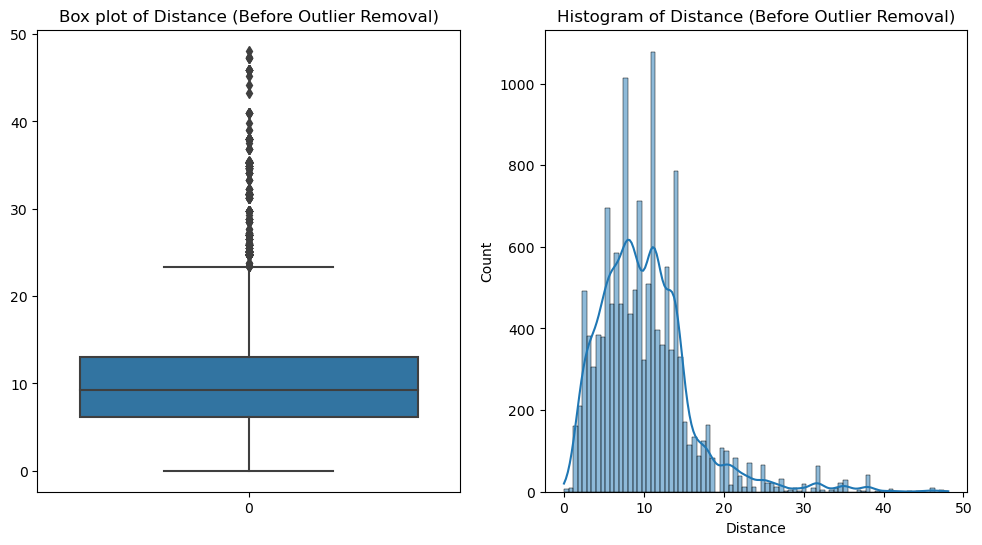

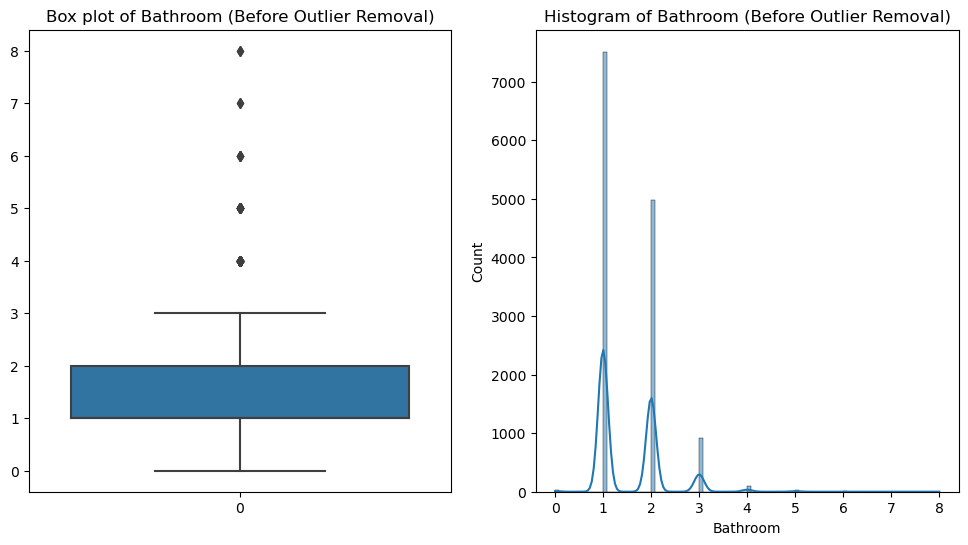

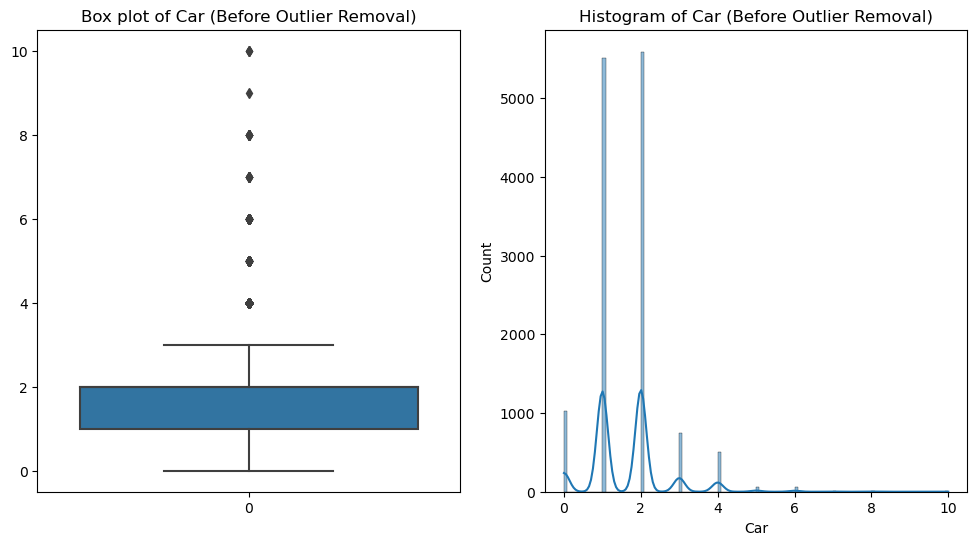

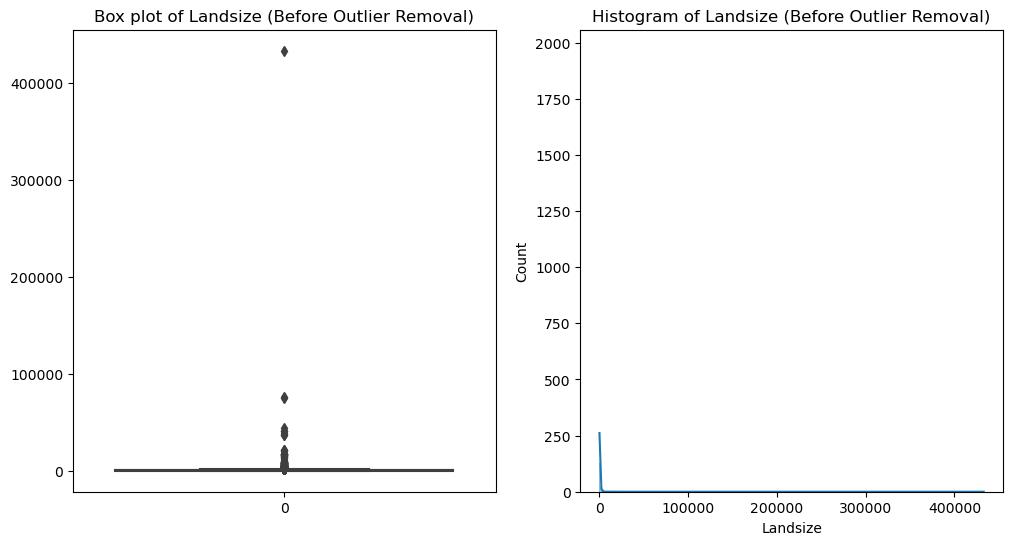

Visualizations after removing outliers:


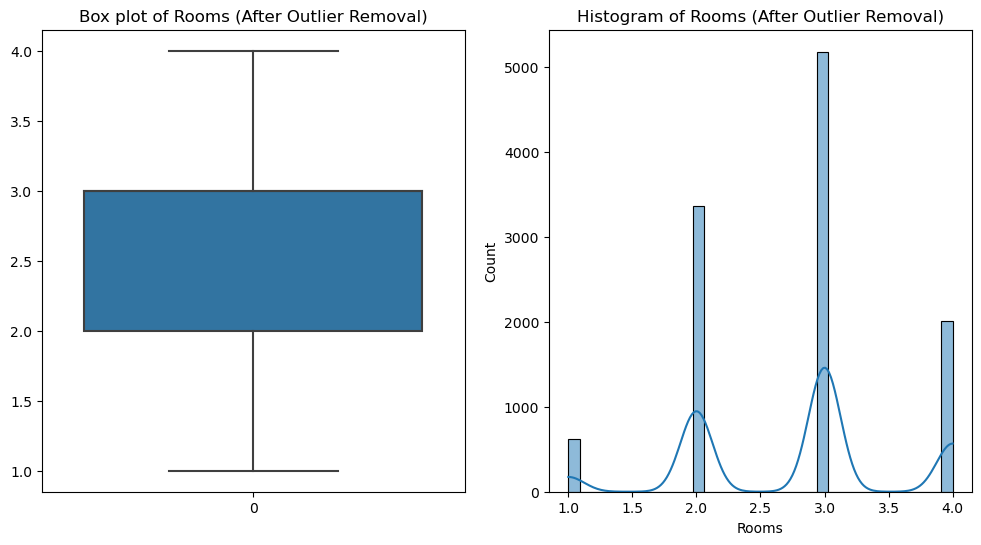

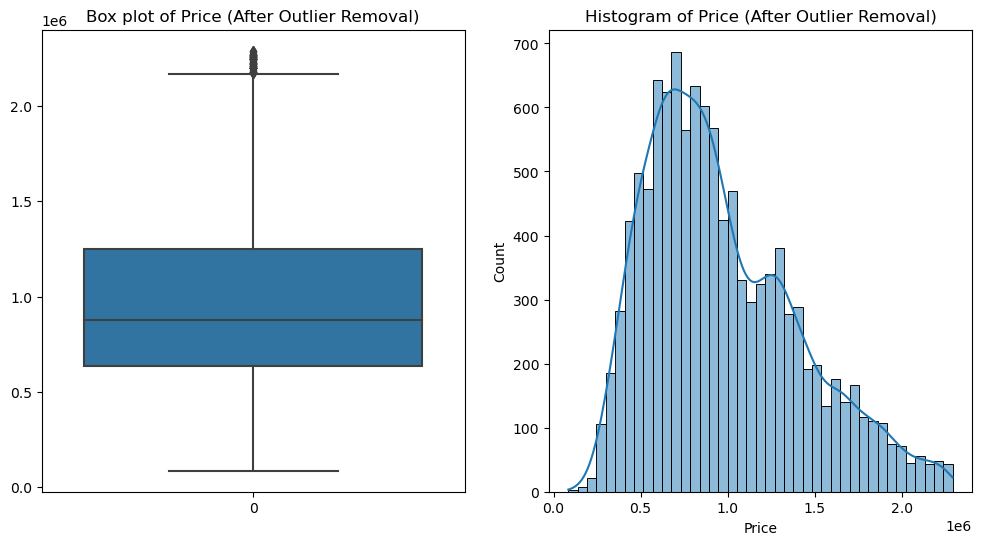

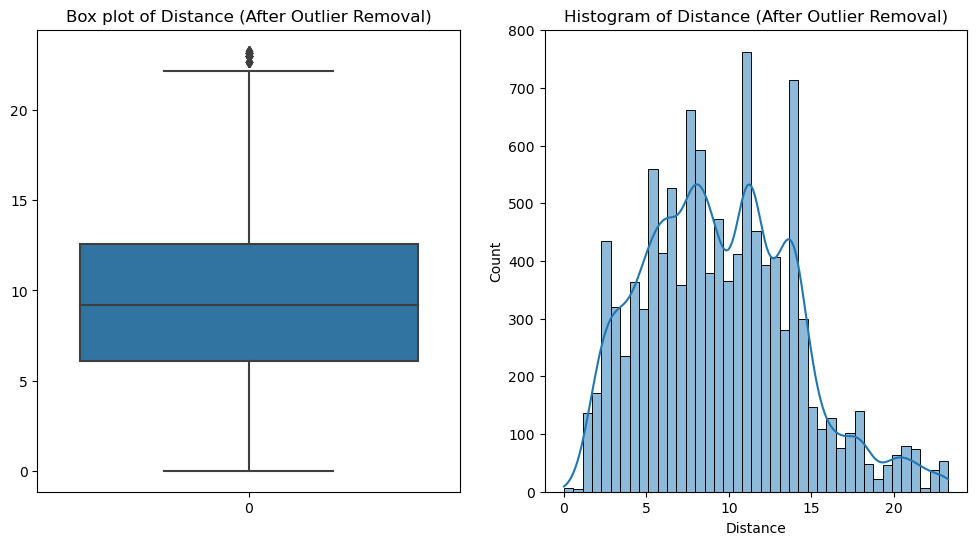

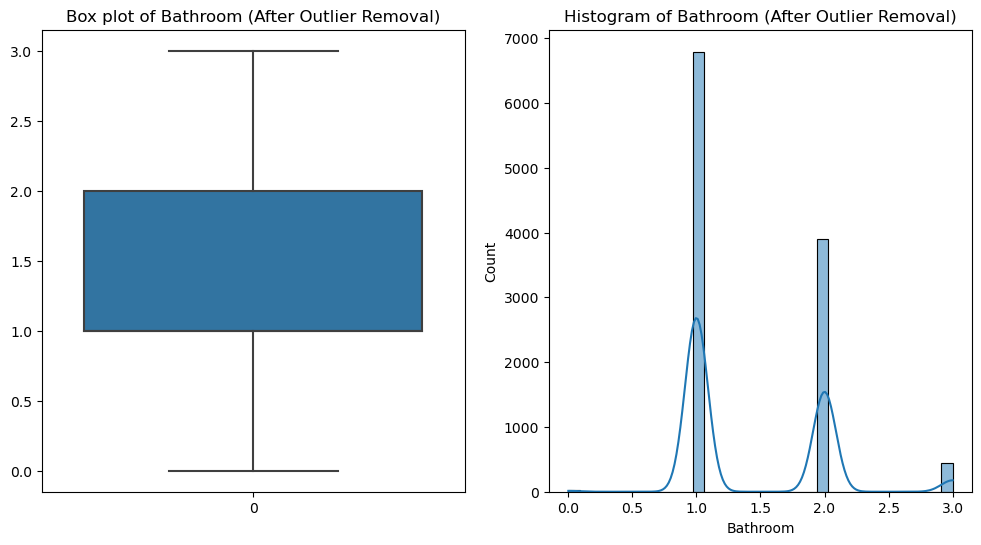

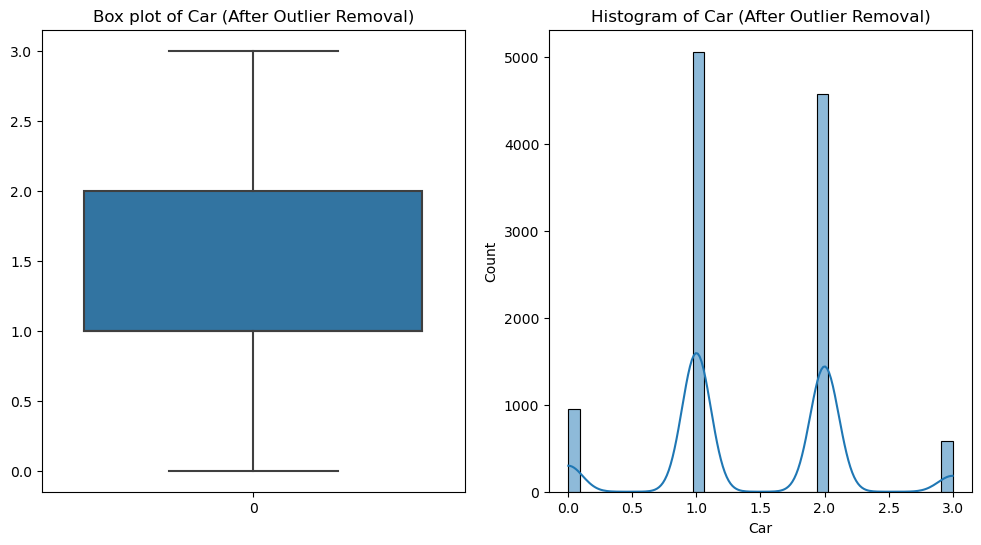

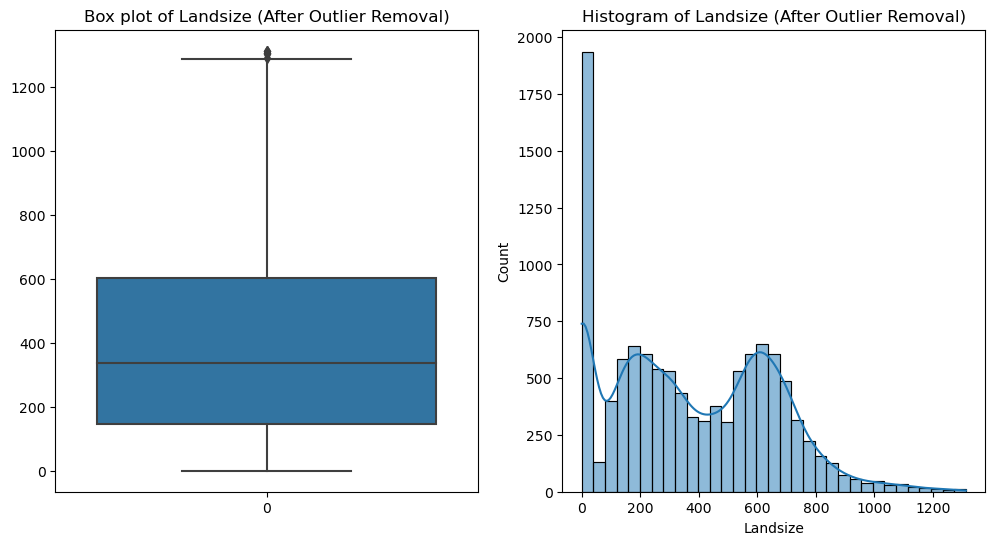

Data shape after removing outliers: (11173, 11)


In [28]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
def create_visualizations(df, columns, title):
    for column in columns:
        plt.figure(figsize=(12, 6))
        
        # Box plot
        plt.subplot(1, 2, 1)
        sns.boxplot(df[column])
        plt.title(f'Box plot of {column} ({title})')
        
        # Histogram
        plt.subplot(1, 2, 2)
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column} ({title})')
        
        plt.show()

# Create visualizations before removing outliers
print("Visualizations before removing outliers:")
create_visualizations(df, columns_to_check, "Before Outlier Removal")
columns_to_check = ['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize']
# Remove outliers
df_cleaned = remove_outliers_iqr(df, columns_to_check)

# Create visualizations after removing outliers
print("Visualizations after removing outliers:")
create_visualizations(df_cleaned, columns_to_check, "After Outlier Removal")

# Print the shape of the cleaned data
print("Data shape after removing outliers:", df_cleaned.shape)


<h1> Building the model</h1>

<h2>Importing libraries</h2>

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


## Data Preparation

The first step involves loading and splitting the data into training and test sets. Categorical and numerical columns are identified for preprocessing 
python


In [30]:


# Function to calculate adjusted R-squared
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Assuming df_cleaned is your cleaned DataFrame
# Define the target variable and feature variables
X = df_cleaned.drop('Price', axis=1)  # Features (excluding the target variable)
y = df_cleaned['Price']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



## Preprocessing

A preprocessing pipeline is defined to handle both numerical and categorical features. Missing values in the `Car` variable are imputed using the median strategy, and numerical features are scaled. Categorical features are encoded using one-hot encoding.


In [31]:
# Select categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['number']).columns

# Add 'Car' column to numerical columns if it's not already there
if 'Car' not in numerical_cols:
    numerical_cols = numerical_cols.append('Car')

# Define the preprocessing pipeline with imputation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])



## Linear Regression with Cross-Validation

A pipeline is created for the Linear Regression model, and 10-fold cross-validation is performed to evaluate the model. The Mean Squared Error (MSE) and adjusted R-squared are calculated.


In [32]:
# Define the pipeline with preprocessing and the Linear Regression model
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LinearRegression())])

# Define the cross-validation strategy
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define a scorer for mean squared error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation for the Linear Regression model
cv_scores = cross_val_score(pipeline_lr, X_train, y_train, cv=kf, scoring=mse_scorer)

# Convert scores to positive values (since greater_is_better=False returns negative MSE)
cv_scores = -cv_scores

# Print the cross-validation results
print("Linear Regression Cross-validation Mean Squared Errors:", cv_scores)
print("Mean MSE:", np.mean(cv_scores))
print("Standard Deviation of MSE:", np.std(cv_scores))

# Fit the Linear Regression pipeline on the entire training set
pipeline_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
n = X_test.shape[0]  # Number of observations
k = X_test.shape[1]  # Number of predictors

# Calculate adjusted R-squared for Linear Regression
adjusted_r2_lr = adjusted_r2(r2_lr, n, k)

# Print the evaluation metrics for Linear Regression
print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R-squared: {r2_lr}")
print(f"Linear Regression - Adjusted R-squared: {adjusted_r2_lr}")


Linear Regression Cross-validation Mean Squared Errors: [4.97494674e+10 5.58447113e+10 5.53746309e+10 4.97560601e+10
 5.28775881e+10 4.85800858e+10 5.73363272e+10 4.94679435e+10
 5.00634558e+10 4.80913137e+10]
Mean MSE: 51714158375.992775
Standard Deviation of MSE: 3191155759.640028
Linear Regression - Mean Squared Error: 50390485610.86018
Linear Regression - R-squared: 0.735247923792649
Linear Regression - Adjusted R-squared: 0.7342966047980125


## Visualization of Linear Regression Results

A scatter plot is created to visualize the actual vs. predicted values for the Linear Regression model.


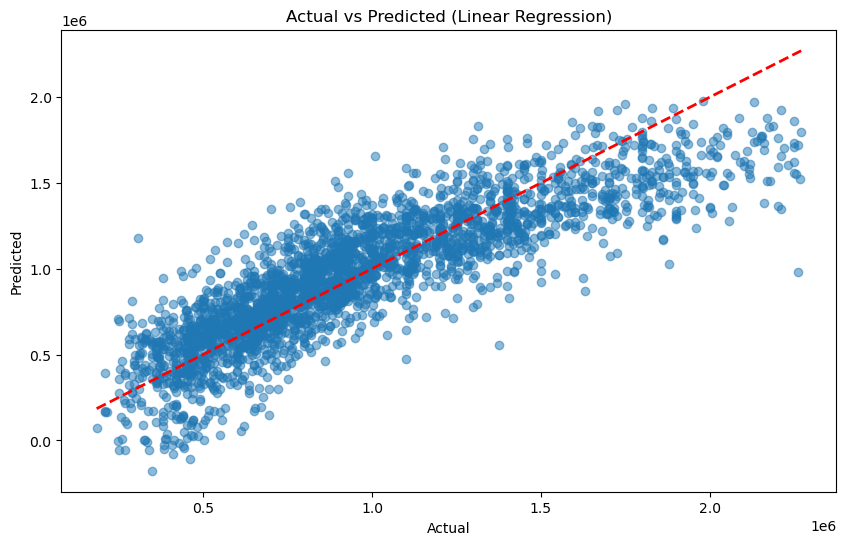

In [33]:
# Function to visualize the results
def plot_results(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Visualize the results for Linear Regression
plot_results(y_test, y_pred_lr, 'Actual vs Predicted (Linear Regression)')


## Random Forest with Hyperparameter Tuning

A Random Forest model is trained using GridSearchCV to find the best hyperparameters. The model is then evaluated using the test set, and the adjusted R-squared is calculated.


In [34]:
# Preprocess the data for Random Forest
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_preprocessed, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Make predictions on the test set
y_pred_rf = grid_search.predict(X_test_preprocessed)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate adjusted R-squared for Random Forest
adjusted_r2_rf = adjusted_r2(r2_rf, n, k)

# Print the evaluation metrics for Random Forest
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")
print(f"Random Forest - Adjusted R-squared: {adjusted_r2_rf}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest - Mean Squared Error: 36561578595.07854
Random Forest - R-squared: 0.8079051288130651
Random Forest - Adjusted R-squared: 0.8072148849352824


## Visualization of Random Forest Results

A scatter plot is created to visualize the actual vs. predicted values for the Random Forest model.



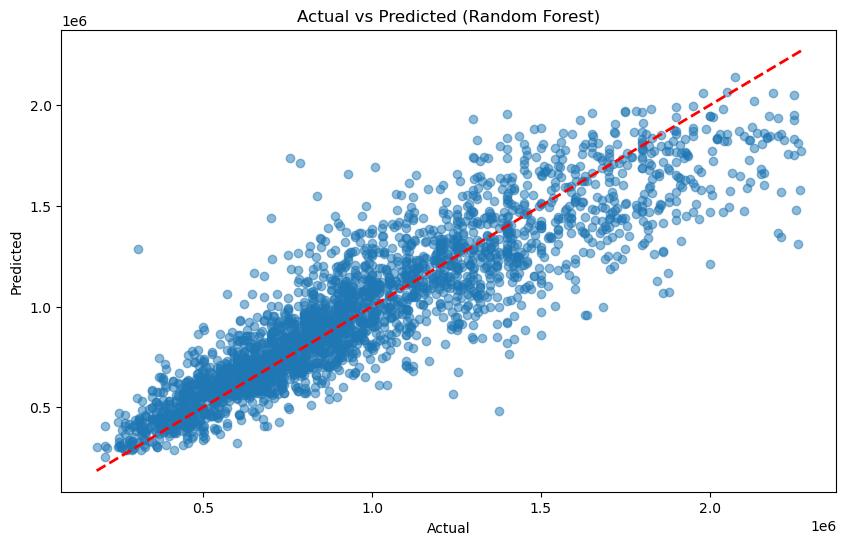

In [35]:
# Visualize the results for Random Forest
plot_results(y_test, y_pred_rf, 'Actual vs Predicted (Random Forest)')


## Gradient Boosting with Hyperparameter Tuning

A Gradient Boosting Regressor model is trained using GridSearchCV to find the best hyperparameters. The model is then evaluated using the test set, and the adjusted R-squared is calculated.


In [36]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Define hyperparameters for tuning
param_grid_gb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Use GridSearchCV for hyperparameter tuning
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_gb.fit(X_train_preprocessed, y_train)

# Best hyperparameters
print("Best hyperparameters for Gradient Boosting:", grid_search_gb.best_params_)

# Make predictions on the test set
y_pred_gb = grid_search_gb.predict(X_test_preprocessed)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Calculate adjusted R-squared for Gradient Boosting
adjusted_r2_gb = adjusted_r2(r2_gb, n, k)

# Print the evaluation metrics for Gradient Boosting
print(f"Gradient Boosting - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting - R-squared: {r2_gb}")
print(f"Gradient Boosting - Adjusted R:{adjusted_r2_gb}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting - Mean Squared Error: 34586569617.05936
Gradient Boosting - R-squared: 0.8182818442012979
Gradient Boosting - Adjusted R:0.817628886401087


## Visualization of Gradient Forest Results

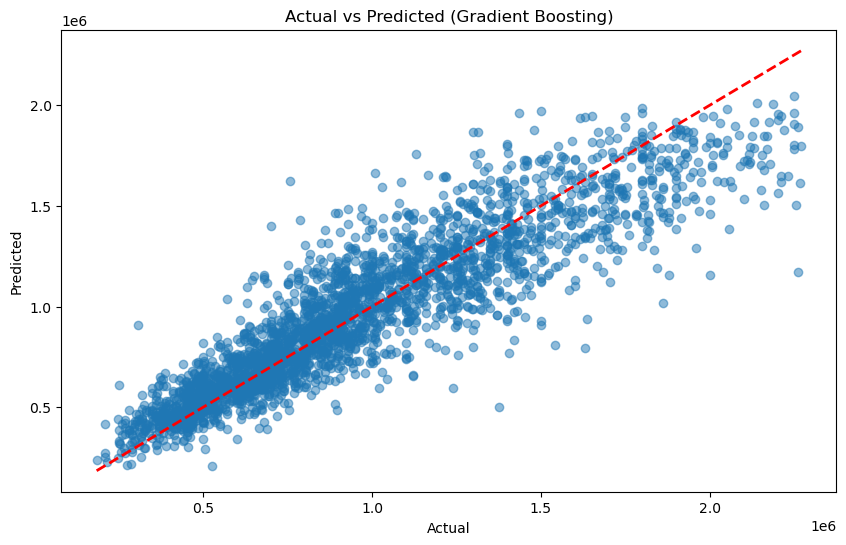

In [37]:
# Visualize the results for Gradient Boosting
plot_results(y_test, y_pred_gb, 'Actual vs Predicted (Gradient Boosting)')


In [38]:
# Summary of Model Evaluation Metrics
print("### Summary of Model Evaluation Metrics")
print("### Linear Regression")
print(f"Mean Squared Error: {mse_lr}")
print(f"R-squared: {r2_lr}")
print(f"Adjusted R-squared: {adjusted_r2_lr}")

print("\n### Random Forest")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")
print(f"Adjusted R-squared: {adjusted_r2_rf}")

print("\n### Gradient Boosting")
print(f"Mean Squared Error: {mse_gb}")
print(f"R-squared: {r2_gb}")
print(f"Adjusted R-squared: {adjusted_r2_gb}")

### Summary of Model Evaluation Metrics
### Linear Regression
Mean Squared Error: 50390485610.86018
R-squared: 0.735247923792649
Adjusted R-squared: 0.7342966047980125

### Random Forest
Mean Squared Error: 36561578595.07854
R-squared: 0.8079051288130651
Adjusted R-squared: 0.8072148849352824

### Gradient Boosting
Mean Squared Error: 34586569617.05936
R-squared: 0.8182818442012979
Adjusted R-squared: 0.817628886401087


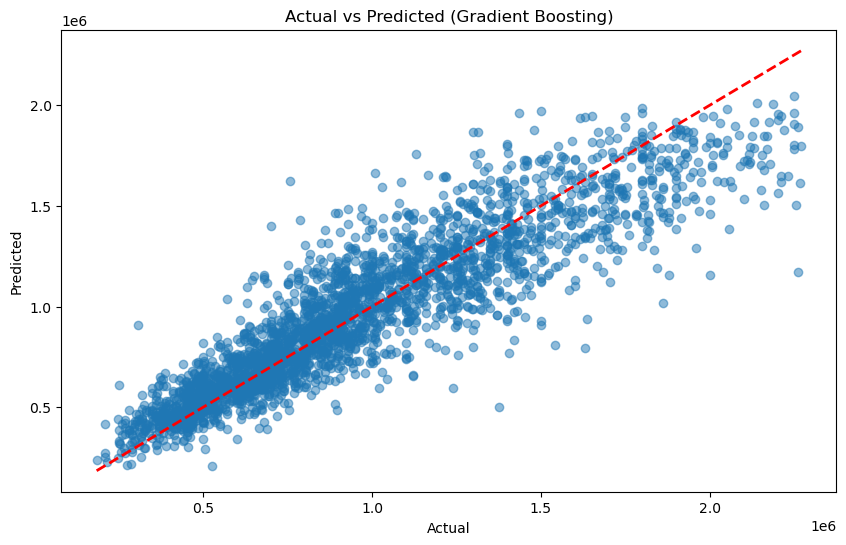

### Test Data Evaluation Metrics
### Linear Regression
Mean Squared Error: 50390485610.86018
R-squared: 0.735247923792649
Adjusted R-squared: 0.7342966047980125

### Random Forest
Mean Squared Error: 36561578595.07854
R-squared: 0.8079051288130651
Adjusted R-squared: 0.8072148849352824

### Gradient Boosting
Mean Squared Error: 34586569617.05936
R-squared: 0.8182818442012979
Adjusted R-squared: 0.817628886401087

### Training Data Evaluation Metrics
### Linear Regression
Mean Squared Error: 48422847340.72507
R-squared: 0.7452046198532756
Adjusted R-squared: 0.7449001320662934

### Random Forest
Mean Squared Error: 9636600703.435051
R-squared: 0.9492933300209115
Adjusted R-squared: 0.9492327340959843

### Gradient Boosting
Mean Squared Error: 24627348472.33089
R-squared: 0.8704137620850727
Adjusted R-squared: 0.8702589028141419


In [39]:
# Visualize the results for Gradient Boosting
plot_results(y_test, y_pred_gb, 'Actual vs Predicted (Gradient Boosting)')

# Summary of Model Evaluation Metrics
print("### Test Data Evaluation Metrics")
print("### Linear Regression")
print(f"Mean Squared Error: {mse_lr}")
print(f"R-squared: {r2_lr}")
print(f"Adjusted R-squared: {adjusted_r2_lr}")

print("\n### Random Forest")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")
print(f"Adjusted R-squared: {adjusted_r2_rf}")

print("\n### Gradient Boosting")
print(f"Mean Squared Error: {mse_gb}")
print(f"R-squared: {r2_gb}")
print(f"Adjusted R-squared: {adjusted_r2_gb}")

# Evaluate the models on the training data
y_train_pred_lr = pipeline_lr.predict(X_train)
y_train_pred_rf = grid_search.predict(X_train_preprocessed)
y_train_pred_gb = grid_search_gb.predict(X_train_preprocessed)

# Calculate metrics for Linear Regression on training data
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)
adjusted_r2_train_lr = adjusted_r2(r2_train_lr, X_train.shape[0], X_train.shape[1])

# Calculate metrics for Random Forest on training data
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
adjusted_r2_train_rf = adjusted_r2(r2_train_rf, X_train.shape[0], X_train.shape[1])

# Calculate metrics for Gradient Boosting on training data
mse_train_gb = mean_squared_error(y_train, y_train_pred_gb)
r2_train_gb = r2_score(y_train, y_train_pred_gb)
adjusted_r2_train_gb = adjusted_r2(r2_train_gb, X_train.shape[0], X_train.shape[1])

# Print the evaluation metrics for training data
print("\n### Training Data Evaluation Metrics")
print("### Linear Regression")
print(f"Mean Squared Error: {mse_train_lr}")
print(f"R-squared: {r2_train_lr}")
print(f"Adjusted R-squared: {adjusted_r2_train_lr}")

print("\n### Random Forest")
print(f"Mean Squared Error: {mse_train_rf}")
print(f"R-squared: {r2_train_rf}")
print(f"Adjusted R-squared: {adjusted_r2_train_rf}")

print("\n### Gradient Boosting")
print(f"Mean Squared Error: {mse_train_gb}")
print(f"R-squared: {r2_train_gb}")
print(f"Adjusted R-squared: {adjusted_r2_train_gb}")


Gradient Boosting Cross-validation Mean Squared Errors: [3.79306750e+10 4.29013731e+10 4.20916810e+10 3.83901583e+10
 3.94124762e+10 3.74051694e+10 4.50592018e+10 3.48184413e+10
 3.56119262e+10 3.23400906e+10]
Mean MSE: 38596119298.75204
Standard Deviation of MSE: 3706882620.134914
Gradient Boosting - Mean Squared Error: 34586569617.05936
Gradient Boosting - R-squared: 0.8182818442012979
Gradient Boosting - Adjusted R-squared: 0.817628886401087


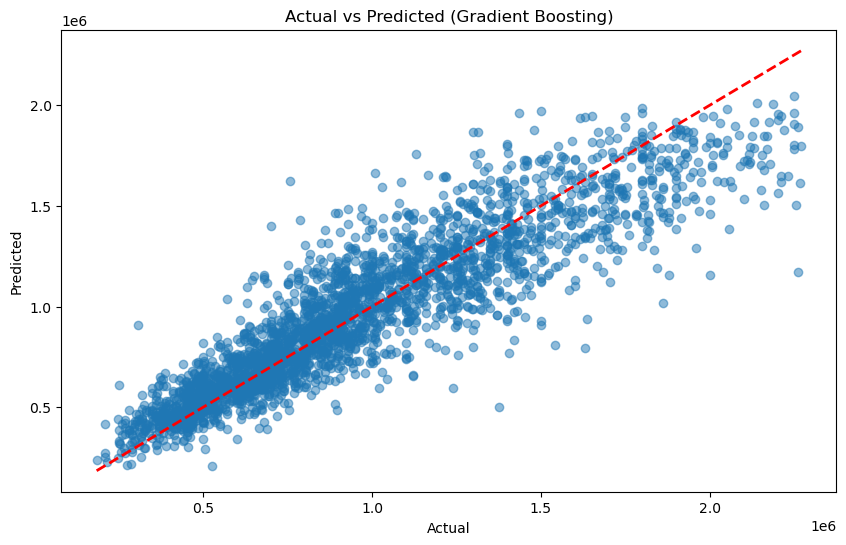

In [40]:
from sklearn.model_selection import cross_val_score

# Initialize the Gradient Boosting model with the best hyperparameters
gb_model_cv = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=200, random_state=42)

# Define the pipeline with preprocessing and the Gradient Boosting model
pipeline_gb_cv = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', gb_model_cv)])

# Perform cross-validation for the Gradient Boosting model
cv_scores_gb = cross_val_score(pipeline_gb_cv, X_train, y_train, cv=kf, scoring=mse_scorer)

# Convert scores to positive values (since greater_is_better=False returns negative MSE)
cv_scores_gb = -cv_scores_gb

# Print the cross-validation results
print("Gradient Boosting Cross-validation Mean Squared Errors:", cv_scores_gb)
print("Mean MSE:", np.mean(cv_scores_gb))
print("Standard Deviation of MSE:", np.std(cv_scores_gb))

# Fit the Gradient Boosting pipeline on the entire training set
pipeline_gb_cv.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb_cv = pipeline_gb_cv.predict(X_test)

# Evaluate the Gradient Boosting model on test data
mse_gb_cv = mean_squared_error(y_test, y_pred_gb_cv)
r2_gb_cv = r2_score(y_test, y_pred_gb_cv)
adjusted_r2_gb_cv = adjusted_r2(r2_gb_cv, X_test.shape[0], X_test.shape[1])

# Print the evaluation metrics for Gradient Boosting
print(f"Gradient Boosting - Mean Squared Error: {mse_gb_cv}")
print(f"Gradient Boosting - R-squared: {r2_gb_cv}")
print(f"Gradient Boosting - Adjusted R-squared: {adjusted_r2_gb_cv}")

# Visualize the results for Gradient Boosting
plot_results(y_test, y_pred_gb_cv, 'Actual vs Predicted (Gradient Boosting)')


In [41]:
#

In [42]:
# Fit the Linear Regression pipeline on the entire training set (if not already done)
pipeline_lr.fit(X_train, y_train)

# Get the coefficients from the linear model
linear_model = pipeline_lr.named_steps['model']
linear_coefficients = linear_model.coef_

# Get feature names after preprocessing
preprocessed_feature_names = list(preprocessor.named_transformers_['num']['scaler'].get_feature_names_out(numerical_cols))
preprocessed_feature_names.extend(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Combine feature names with their coefficients
coefficients = pd.DataFrame({'Feature': preprocessed_feature_names, 'Coefficient': linear_coefficients})

print(coefficients)


                                   Feature    Coefficient
0                                    Rooms  123876.317338
1                                 Distance -211795.222807
2                                 Postcode  124734.091884
3                                 Bathroom   45402.278247
4                                      Car   20331.747226
..                                     ...            ...
262       Regionname_Northern Metropolitan -157296.732518
263           Regionname_Northern Victoria   40901.762375
264  Regionname_South-Eastern Metropolitan   88844.233722
265       Regionname_Southern Metropolitan   28905.957258
266        Regionname_Western Metropolitan -131045.271864

[267 rows x 2 columns]


In [43]:
# Get the feature importances from the gradient boosting model
gb_model = grid_search_gb.best_estimator_
gb_feature_importances = gb_model.feature_importances_

# Combine feature names with their importances
feature_importances_gb = pd.DataFrame({'Feature': preprocessed_feature_names, 'Importance': gb_feature_importances})

print(feature_importances_gb.sort_values(by='Importance', ascending=False))


                              Feature  Importance
1                            Distance    0.178839
202                            Type_u    0.168231
265  Regionname_Southern Metropolitan    0.144597
2                            Postcode    0.108989
0                               Rooms    0.093252
..                                ...         ...
188                   Suburb_Watsonia    0.000000
184              Suburb_Vermont South    0.000000
104           Suburb_Hoppers Crossing    0.000000
103                   Suburb_Hillside    0.000000
119                  Suburb_Maidstone    0.000000

[267 rows x 2 columns]


<h2>Export the Gradient boosting model in a pickle file</h2>

In [44]:
import pickle
with open('melbourne_house_price_model.pickle','wb') as f:
    pickle.dump(gb_model_cv ,f)

In [45]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  22.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  15.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  12.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  12.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   6.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   6.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   6.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  18.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; t

In [51]:
import numpy as np

def predict_price(suburb, rooms, house_type, date, distance, postcode, bathroom, car, landsize, regionname):
    # Create a dictionary with input features
    input_features = {
        'Suburb': suburb,
        'Rooms': rooms,
        'Type': house_type,
        'Date': date,
        'Distance': distance,
        'Postcode': postcode,
        'Bathroom': bathroom,
        'Car': car,
        'Landsize': landsize,
        'Regionname': regionname
    }

    # Create a DataFrame with a single row for preprocessing
    input_df = pd.DataFrame(input_features, index=[0])

    # Preprocess the input features
    x_preprocessed = preprocessor.transform(input_df)

    # Predict the price using the Gradient Boosting model
    return grid_search_gb.predict(x_preprocessed)[0]

# Example usage:
suburb = 'Abbotsford'  # Replace with actual suburb or its corresponding encoded value
rooms = 2
house_type = 'h'  # Replace with actual house type or its corresponding encoded value
date = '3/12/2016'  # Replace with actual date
distance = 2.5
postcode = 3070  # Replace with actual postcode
bathroom = 1
car = 1
landsize = 202
regionname = 'Northern Metropolitan'  # Replace with actual region name or its corresponding encoded value

predicted_price = predict_price(suburb, rooms, house_type, date, distance, postcode, bathroom, car, landsize, regionname)
print(predicted_price)


1204100.901390934


In [ ]:
Abbotsford	85 Turner St	2	h	1480000.0	S	Biggin	3/12/2016	2.5	3067.0	...	1.0	1.0	202.0	NaN	NaN	Yarra	-37.7996	144.9984	Northern Metropolitan	4019.0